# LAB - Handling Data imbalance Classification Model 

## Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

## Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class. Here is the list of steps to be followed (building a simple model without balancing the data):



## Round 1

In [1]:
# Import the required libraries and modules that you would need :

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read that data into Python and call the dataframe churnData :

churnData = pd.read_csv('DATA_Customer-Churn.txt')

In [3]:
churnData.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [4]:
#Check the datatypes of all the columns in the data:

churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function :

churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [6]:
churnData.dtypes #check the datatypes again, you would see that TotalCharges is now of float64 type.

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
# Check for null values in the dataframe :

churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# Replace the null values :

churnData['TotalCharges'] = churnData['TotalCharges'].replace(np.nan,0)

In [9]:
churnData.isnull().sum() #check the missing values again, if the output is 0, then there are no missing values.

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
""" 

Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
Split the data into a training set and a test set.
Scale the features either by using MinMaxScaler or a standard scaler.

"""

churn_datanum = churnData._get_numeric_data()
churn_datanum

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [11]:
from sklearn.model_selection import train_test_split

def split_data(X, y, test_size=0.2, random_state=42):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

In [12]:
X = churn_datanum
y = churnData.Churn

In [13]:
churnData['Churn']=churnData['Churn'].replace({'No': 0, 'Yes': 1})
y=y.replace({'No': 0, 'Yes': 1})


In [14]:
X_train, X_test, y_train, y_test = split_data(X, y)

In [15]:
from sklearn.preprocessing import StandardScaler

def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_train_scaled =pd.DataFrame(X_train_scaled, columns=X_train.columns)
    
    X_test_scaled = scaler.transform(X_test)
    X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled

In [16]:
X_train_scaled,X_test_scaled=scale_features(X_train, X_test)

## Round 2

In [17]:
# Fit a Knn Classifier (NOT KnnRegressor please!)model on the training data :

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
#  importing the required libraries and modules that you would need :
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

,Error_metric,Train,Test
0,Accuracy,0.782570,0.792051
1,Precision,0.648738,0.663934
2,Recall,0.395053,0.434316


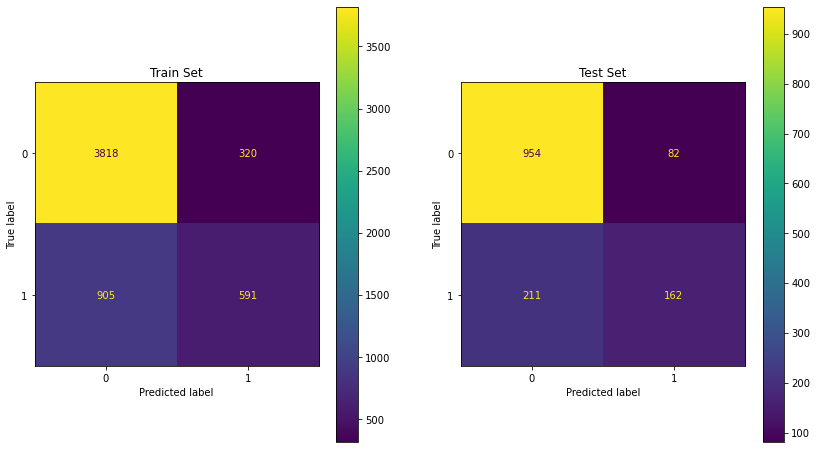

In [19]:
# Fit a Decision Tree Classifier model  :
model_tree = DecisionTreeClassifier(max_depth=3)

model_tree.fit(X_train, y_train)

y_pred_train_dt = model_tree.predict(X_train)
y_pred_test_dt = model_tree.predict(X_test)

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
ConfusionMatrixDisplay.from_estimator(model_tree,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
ConfusionMatrixDisplay.from_estimator(model_tree,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")


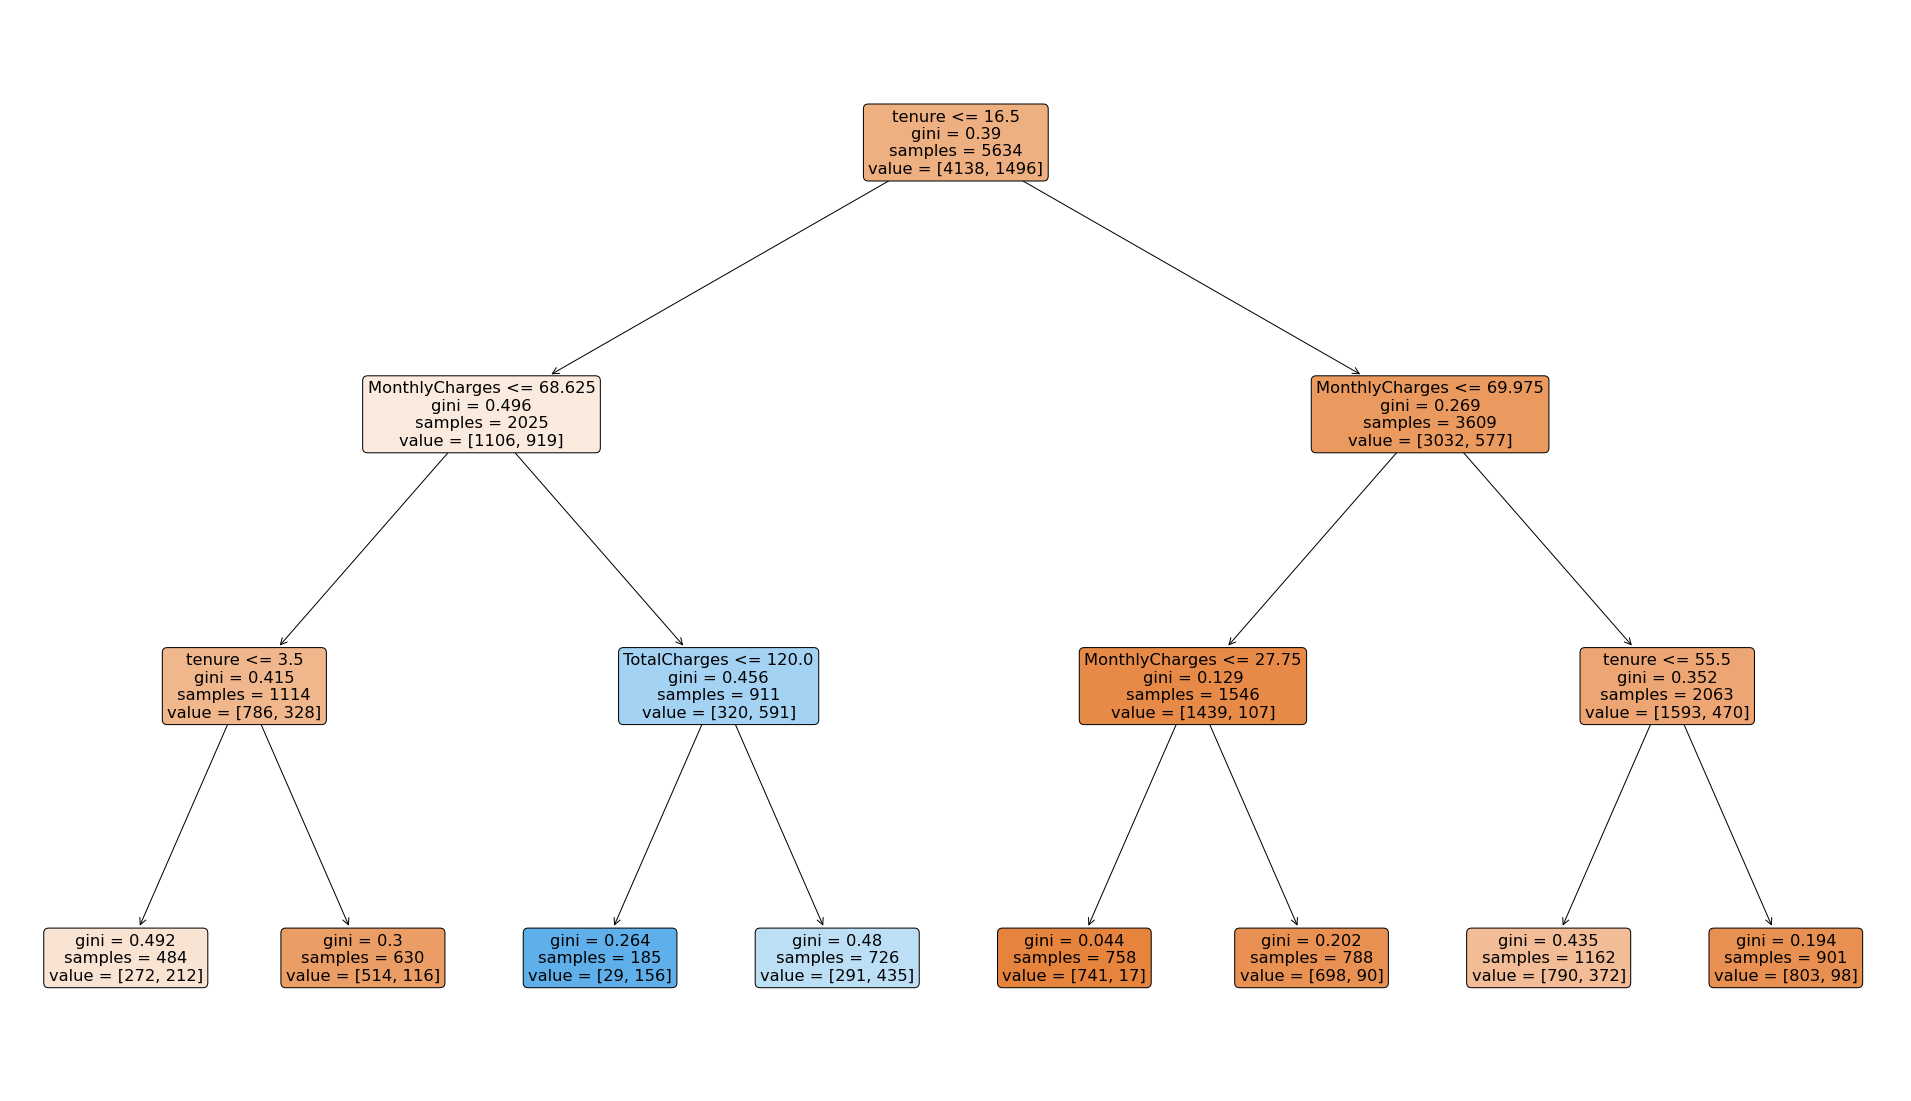

In [20]:
from sklearn.tree import plot_tree 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model_tree,filled = True, rounded=True,feature_names=X.columns)
plt.show()

In [21]:
#Comparing the accuracy, precision, recall for the previous models on both the train and test sets :

#  accuracy, precision, recall for the model on both the train and test sets for the KNN model :

from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = knn.predict(X_test)

print("knn model performance on the test set")

print('Accuracy: ', accuracy_score(y_test, y_pred))

print('Precision: ', precision_score(y_test, y_pred))

print('Recall: ', recall_score(y_test, y_pred))

print("--------------------------------")

# knn model performance on the train set :

y_pred = knn.predict(X_train)

print("knn model performance on the train set")

print('Accuracy: ', accuracy_score(y_train, y_pred))

print('Precision: ', precision_score(y_train, y_pred))

print('Recall: ', recall_score(y_train, y_pred))


print("--------------------------------")

#  accuracy, precision, recall for the model on both the train and test sets for the Decision Tree model :

print("decision tree model performance on the test set")

display(performance_df)

knn model performance on the test set
Accuracy:  0.7672107877927609
Precision:  0.5705329153605015
Recall:  0.4879356568364611
--------------------------------
knn model performance on the train set
Accuracy:  0.8553425630102947
Precision:  0.7691699604743083
Recall:  0.6504010695187166
--------------------------------
decision tree model performance on the test set


,Error_metric,Train,Test
0,Accuracy,0.782570,0.792051
1,Precision,0.648738,0.663934
2,Recall,0.395053,0.434316


## Round 3

In [22]:
# Importing libraries and modules that you would need :
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

apply K-fold cross validation on your models built before,  and check the model score. Note: So far we have not balanced the data.

In [23]:
# apply K-fold cross validation on your models built before :

#  K-fold cross validation on the decision tree model (called model_tree here) :

print("The (mean) accuracy on the test set is %.2f" %(model_tree.score(X_test, y_test)))
print("The (mean) accuracy on the train data is %.2f" %(model_tree.score(X_train, y_train)))

The (mean) accuracy on the test set is 0.79
The (mean) accuracy on the train data is 0.78


In [24]:
scores=cross_val_score(model_tree, X_train, y_train, cv=5)
print("Cross validation scores: ", scores)
print("Score stats: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross validation scores:  [0.78615794 0.78793256 0.76397516 0.78083407 0.77886323]
Score stats: 0.78 accuracy with a standard deviation of 0.01


In [28]:
print("The (mean) accuracy on the test set is %.2f" %(knn.score(X_test, y_test)))
print("The (mean) accuracy on the train data is %.2f" %(knn.score(X_train, y_train)))

The (mean) accuracy on the test set is 0.77
The (mean) accuracy on the train data is 0.86


In [27]:
#  K-fold cross validation on the KNN model :

knn_scores=cross_val_score(knn, X_train, y_train, cv=5)
print("Cross validation scores: ", knn_scores)
print("Score stats: %0.2f accuracy with a standard deviation of %0.2f" % (knn_scores.mean(), scores.std()))

Cross validation scores:  [0.75687666 0.74534161 0.74001775 0.7364685  0.74333925]
Score stats: 0.74 accuracy with a standard deviation of 0.01


## Managing imbalance in the dataset

In [30]:
# Check for the imbalance :

churnData['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [31]:
churnData['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

#### Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes :

In [32]:
# Upsampling and downsampling to create a balance between the two classes :

category_0 = churnData[churnData['Churn'] == 0] # negative class (majority)
category_1 = churnData[churnData['Churn'] == 1] # positive class (minority)

In [33]:
print(category_0.shape)
print(category_1.shape)

(5174, 16)
(1869, 16)


##### Downsampling :

In [34]:
c1_len = 1869 # number of positive labels

In [35]:
# downsample the majority class to the size of the positive class using pandas sample method
category_0_down = category_0.sample(c1_len)
print(category_0_down.shape)
print(category_1.shape)

(1869, 16)
(1869, 16)


In [85]:
# reassemble the data
churnData = pd.concat([category_0_down, category_1], axis=0)
# shuffle the data
churnData= churnData.sample(frac=1) # frac specifies ratio of the shuffled output to the input size. for frac=1 the number of rows is unchanged
churnData['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [86]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
38,Male,0,No,No,34,Yes,No,Yes,Yes,No,Yes,Yes,Month-to-month,106.35,3549.25,1
6948,Female,0,No,No,47,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,103.70,4730.60,0
5450,Male,0,No,No,1,Yes,No,No,No,No,Yes,No,Month-to-month,84.65,84.65,1
4073,Male,0,Yes,Yes,14,Yes,Yes,Yes,No,No,Yes,No,Month-to-month,65.45,937.60,1
2030,Male,0,No,Yes,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,60.95,134.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,Female,0,Yes,Yes,23,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.40,478.75,0
1341,Male,0,No,Yes,3,Yes,No,No,No,No,Yes,No,Month-to-month,54.70,169.45,1
4769,Male,0,Yes,Yes,35,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,19.90,666.00,0
5249,Male,0,No,Yes,72,No,Yes,Yes,Yes,Yes,Yes,Yes,Two year,67.20,4671.70,0


##### Upsampling (using pandas sample):

In [92]:
# Refreshing the data :

# Refreshing the kernel and runing all the cells before the downsampling again :

In [36]:
category_0 = churnData[churnData['Churn'] == 0] # negative class (majority)
category_1 = churnData[churnData['Churn'] == 1] # positive class (minority)

In [39]:
c0_len = len(category_0)
c1_len = len(category_1)
c0_len,c1_len

(5174, 1869)

In [38]:
churnData['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [40]:
# upsample the positive class now
# - pump it up to the length of the negative class by allowing for row repetition
category_1_up = category_1.sample(c0_len, replace=True) # replace=True allows sampling of the same row more than once.
print(category_1_up.shape) # see that it's the same size a category_0

(5174, 16)


In [41]:
category_1_up

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
5397,Male,0,No,No,6,Yes,No,Yes,No,No,Yes,No,Month-to-month,84.85,523.50,1
1807,Female,0,No,No,1,Yes,No,No,Yes,No,No,No,Month-to-month,76.35,76.35,1
3079,Female,0,No,No,4,Yes,No,Yes,No,No,Yes,Yes,Month-to-month,68.65,261.25,1
64,Female,0,No,No,9,Yes,No,No,No,No,Yes,Yes,Month-to-month,94.40,857.25,1
2861,Female,0,No,No,1,Yes,No,No,No,No,No,Yes,Month-to-month,81.95,81.95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,Female,0,No,No,4,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,20.35,77.50,1
3528,Male,0,No,No,16,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,19.70,342.40,1
1412,Female,0,Yes,No,15,Yes,No,No,Yes,No,Yes,No,Month-to-month,84.30,1308.40,1
3950,Male,1,No,No,49,Yes,No,No,No,No,Yes,Yes,Month-to-month,96.20,4718.25,1


In [42]:
churnData = pd.concat([category_0, category_1_up], axis=0)
#shuffling the data
churnData = churnData.sample(frac=1)
churnData['Churn'].value_counts()



1    5174
0    5174
Name: Churn, dtype: int64

In [ ]:
# Each time fit the model and check the accuracy of the model :

# Fit a Decision Tree Classifier model  :

model_tree = DecisionTreeClassifier(max_depth=3)

model_tree.fit(X_train, y_train)

y_pred_train_dt = model_tree.predict(X_train)
y_pred_test_dt = model_tree.predict(X_test)

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                 'Train': [accuracy_score(y_train, y_pred_train_dt),
                                             precision_score(y_train, y_pred_train_dt),
                                                recall_score(y_train, y_pred_train_dt)],
                                    'Test': [accuracy_score(y_test, y_pred_test_dt),
                                                precision_score(y_test, y_pred_test_dt),
                                                recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

# Fit a KNN Classifier model  :

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                    'Train': [accuracy_score(y_train, y_pred_train_knn),
                                                precision_score(y_train, y_pred_train_knn),
                                                recall_score(y_train, y_pred_train_knn)],
                                    'Test': [accuracy_score(y_test, y_pred_test_knn),

                                                precision_score(y_test, y_pred_test_knn),
                                                recall_score(y_test, y_pred_test_knn)]})

display(performance_df)